# Your Very First Machine Learning (ML) Model: Logistic Regression

Dataset: [College Student Placement Factors Dataset](https://www.kaggle.com/datasets/sahilislam007/college-student-placement-factors-dataset) (`data/college_student_placement_dataset.csv`)

In [55]:
pip install statsmodels


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import our libraries.

from IPython.display import display

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm

## Constants

It is a good programming practice to use constants to avoid repetition errors and to save yourself the effort of retyping the expression by _centralizing_ semantically identical values.

`DATASET_PATH` identifies the path to the dataset being loaded and operated on. `RANDOM_STATE` makes otherwise random operations reproducible run after run. Keep whatever value you set it to unless you want slightly different results.

In [3]:
DATASET_PATH = "../data/college_student_placement_dataset.csv"
RANDOM_STATE = 45  # DO NOT CHANGE THIS RANDOM STATE

## Preliminary Inspection

See what the raw file looks like!

In [4]:
# Look at the first 5 lines of theraw contents of the file first.

with open(DATASET_PATH, "r") as file:
    for line_number in range(5):
        if line := file.readline():
            print(line)
        else:
            break  # Stop; there are less than 5 lines.

College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement

CLG0030,107,6.61,6.28,8,No,8,8,4,No

CLG0061,97,5.52,5.37,8,No,7,8,0,No

CLG0036,109,5.36,5.83,9,No,3,1,1,No

CLG0055,122,5.47,5.75,6,Yes,1,6,1,No



## Preliminary Load

Load the data. This is not the final form of the data which will be used, but it’s a `DataFrame` for further inspection so we can decide what to do with it next.

In [5]:
# Load the dataset into a pandas dataframe.

df = pd.read_csv("../data/college_student_placement_dataset.csv")
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


## Null Values Check
Inspect which varibles may be good / not good for using as features based on null values. 


In [6]:
# Identify which columns have null values.
df.isnull().sum()


College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

## Duplicate Rows Check
If so, remove the duplicates.

In [7]:
# Check to see if our data has any duplicate rows.
duplicates_rows = df.duplicated().sum()
print(duplicates_rows)

0


Many clean… 😐

## Categorical Categories

What are the categories for the categorial-looking (i.e., non-numeric) columns?

In [40]:
categorical_cols = df.select_dtypes(include=['object']).columns

print(f"Categorical columns: {list(categorical_cols)}")

Categorical columns: ['College_ID', 'Internship_Experience', 'Placement']


In [45]:
df["Internship_Experience"] = df["Internship_Experience"].map({"Yes": 1, "No": 0})
df["Placement"] = df["Placement"].map({"Yes": 1, "No": 0})

## Feature Engineering

Non-numeric columns containing `'Yes'` and `'No'` do not work with logistic regression. Binary categories can be converted an integral type (`int`) with a value of 0 or 1.

In [41]:
pd.get_dummies(df, columns=["Internship_Experience", "Placement"], drop_first=True)
df.head()


,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


❔ When should you use this versus using `pd.get_dummies`?

# Visualization with `sns.pairplot`

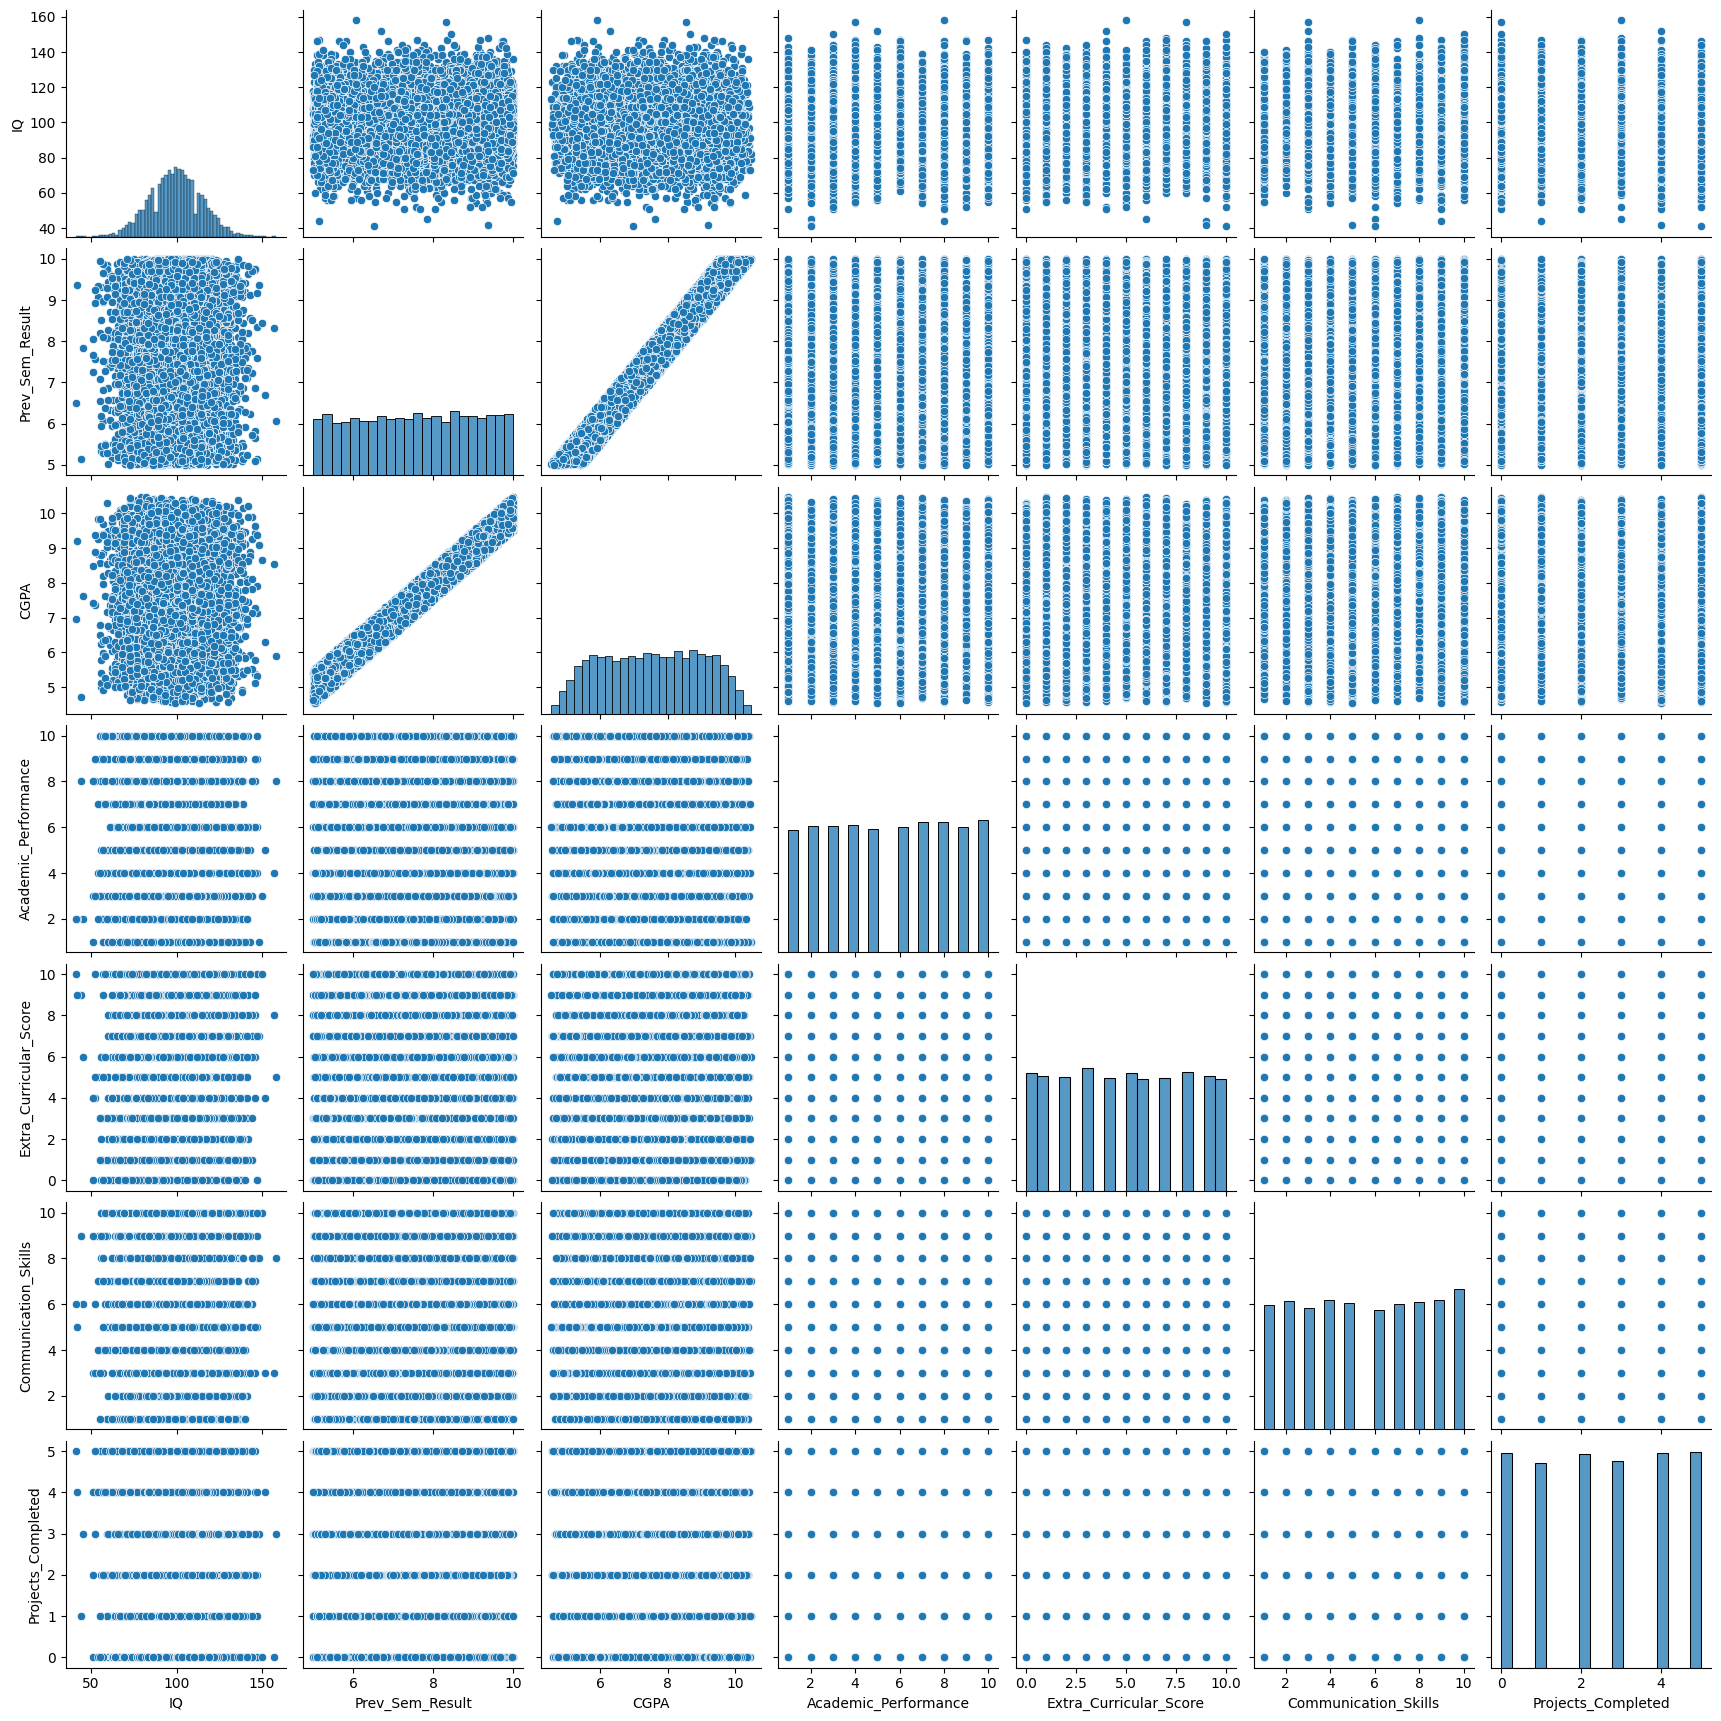

In [42]:
# Use sns.pariplot to visualize.
#sns.pairplot(df, hue="Placement")
sns.pairplot(df)

## Feature Selection 

Choose the columns corresponding to the features _IQ_ and _internship experience_ to be your `X`. Target _placement_ as your `y`.

In [8]:
# Set X to the desired features.
selected_features = ["IQ", "Internship_Experience"]

X = df[selected_features]

y = df["Placement"]



## Split to Testing and Training Datasets 

In [57]:
# Split our data into testing and training pairs.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Print the length and width of our testing data.
print("X_train: %d rows, %d columns" % X_train.shape)
print("X_test: %d rows, %d columns" % X_test.shape)
print("y_train: %d rows, 1 column" % y_train.shape)
print("y_test: %d rows, 1 column" % y_test.shape)

X_train: 8000 rows, 2 columns
X_test: 2000 rows, 2 columns
y_train: 8000 rows, 1 column
y_test: 2000 rows, 1 column


## Build and train your model

Initialize an empty Logistic Regression model, and then fit your model to your training data. 

In [58]:
from sklearn.linear_model import LogisticRegression

# Initalize  model.
model = LogisticRegression()

print(type(model))
model.fit(X=X_train, y=y_train)


<class 'sklearn.linear_model._logistic.LogisticRegression'>


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## Evaluation

Make predictions with your test data and save the predictions as `y_pred`.

In [59]:
# 1. Make predictions of your test data and save them as `y_pred`.
y_pred = model.predict(X_test)
y_pred


array([0, 0, 0, ..., 1, 0, 0], shape=(2000,))

Calculate and print the accuracy, precision, recall, and F1 scores of your model.

In [62]:
# 2. Calculate and print the accuracy, precision, recall, and F1 scores of your model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy Score: {accuracy:.2f}")
print(f"Precision Score: {precision:.2f}")
print(f"Recall Score: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy Score: 0.84
Precision Score: 0.32
Recall Score: 0.04
F1 Score: 0.07


Plot a confusion matrix of your predicted results.

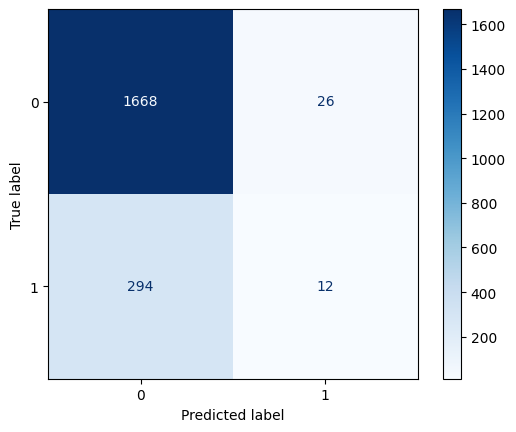

In [63]:
# 3. Plot a confusion matrix of your predicted results.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()


How many true positives and true negatives did your model get?

In [65]:
# How many true positives and true negatives did your model get?
from sklearn.metrics import confusion_matrix

# Get confusion matrix values
true_negatives, false_positives, false_negatives, true_positives = confusion_matrix(y_test, y_pred).ravel()
print('True Negatives: %d' % true_negatives)
print('True Positives: %d' % true_positives)

True Negatives: 1668
True Positives: 12


Such awful 😞

# What is the Most Important Feature
 
Use `statsmodel` to create a summary report. Interpret the results.

In [66]:
# Add a constant term to the independent variables.
import statsmodels.api as sm
X_sm = sm.add_constant(X)



# Fit the model.
logit_model = sm.Logit(y, X_sm)
result = logit_model.fit()


# Print the summary and interpret the results.
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.406531
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Placement   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Thu, 23 Oct 2025   Pseudo R-squ.:                 0.09524
Time:                        16:04:05   Log-Likelihood:                -4065.3
converged:                       True   LL-Null:                       -4493.3
Covariance Type:            nonrobust   LLR p-value:                1.408e-186
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -7.4077      0.224    -33.142      0.000      -7.846      -6.

# Extra Credit: Use your brain and make a better model (as in better scores).



In [ ]:
# Define the new X variable, and reuse the same y variable from before.


# Split our data into testing and training. Remember to use the same random state as you used before


# Initalize our model.


# Fit-train our model using our training data.


# Make new predicitions using our testing data.


# Print each of our scores to inspect performance.


# Plot the confusion matrix.